# eprl + uncertainty
## title
#### 10/2/18
---

Some background info here
<center>
    <img src="eprl_variability_mturk_design.jpg" width="700">
</center>

In [4]:
sns.set_context("poster")

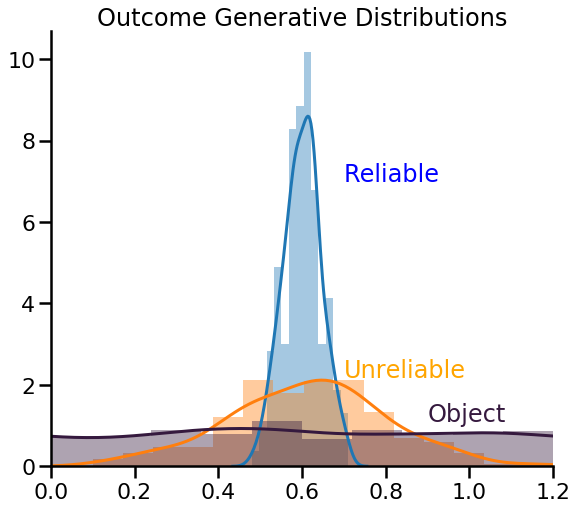

In [6]:
plt.figure(figsize=(9, 8))
plotGenerativeDists(nTimepoints=300)

In [7]:
# Retrieve behavioral data for analysis
data = process_data()
train_data = data[(data.test_part == 'train') & (data.choice != 'no_response')]
test_data = data[(data.test_part == 'test') & (data.choice != 'no_response')]

In [8]:
print(len(test_data.subjectID.unique()))

251


 # Training Phase Analysis
 ---
 1. Do participants prefer the reliable incremental option?
    - How does this change with experience?

 2. Do participants preferentially choose old objects over new objects?
     - Does this increase with an object's value?

### 1. Participants preferentially choose the reliable option during training

In [14]:
full_train_inc_data = getPropIncResponse(n_bins=1)
bin5_train_inc_data = getPropIncResponse(n_bins=5)

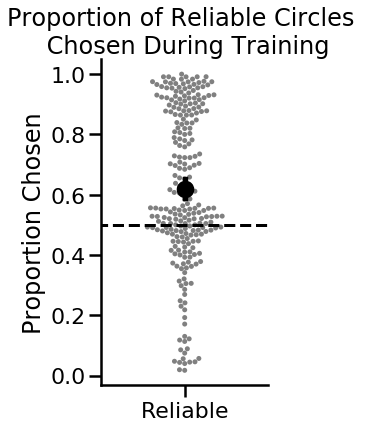

In [19]:
plt.figure(figsize=(3,6))
sns.pointplot(x="bin",y="prop_inc_chosen",color='k',data=full_train_inc_data[full_train_inc_data.choice == "blue"])
a = sns.swarmplot(x="bin",y="prop_inc_chosen",color='grey',data=full_train_inc_data[full_train_inc_data.choice == "blue"],zorder=0)
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Reliable Circles \n Chosen During Training")
a.set_ylabel("Proportion Chosen")
a.set_xticklabels(["Reliable"])
a.set_xlabel("")
plt.show()

High degree of individual variability and many participants show no preference

### 1a. Reliability preference stabilizes quickly with experience

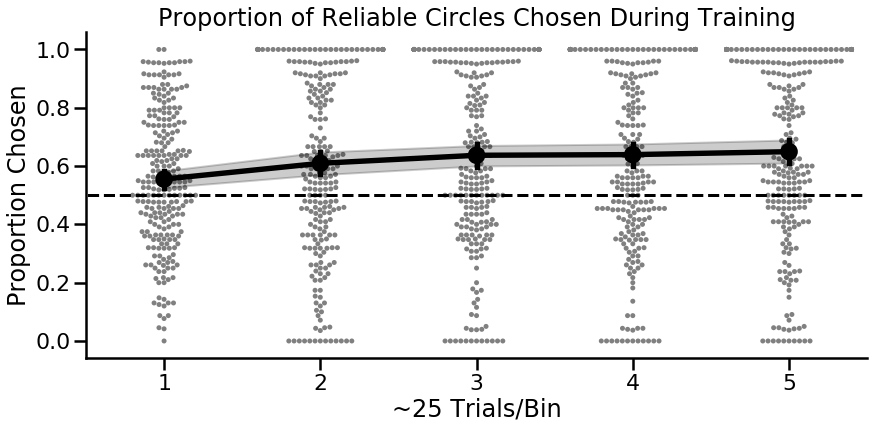

In [20]:
plt.figure(figsize=(14,6))
sns.pointplot(x="bin",y="prop_inc_chosen",color='k',data=bin5_train_inc_data[bin5_train_inc_data.choice == "blue"])
sns.lineplot(x="bin",y="prop_inc_chosen",color='k',data=bin5_train_inc_data[bin5_train_inc_data.choice == "blue"])
a = sns.swarmplot(x="bin",y="prop_inc_chosen",color="grey",data=bin5_train_inc_data[bin5_train_inc_data.choice == "blue"],zorder=0)
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Reliable Circles Chosen During Training")
a.set_ylabel("Proportion Chosen")
a.set_xticklabels([1,2,3,4,5])
a.set_xlabel("~25 Trials/Bin")
plt.show()

### 2. Participants preferentially choose old objects during training

In [17]:
train_ep_data = getPropEpResponse()

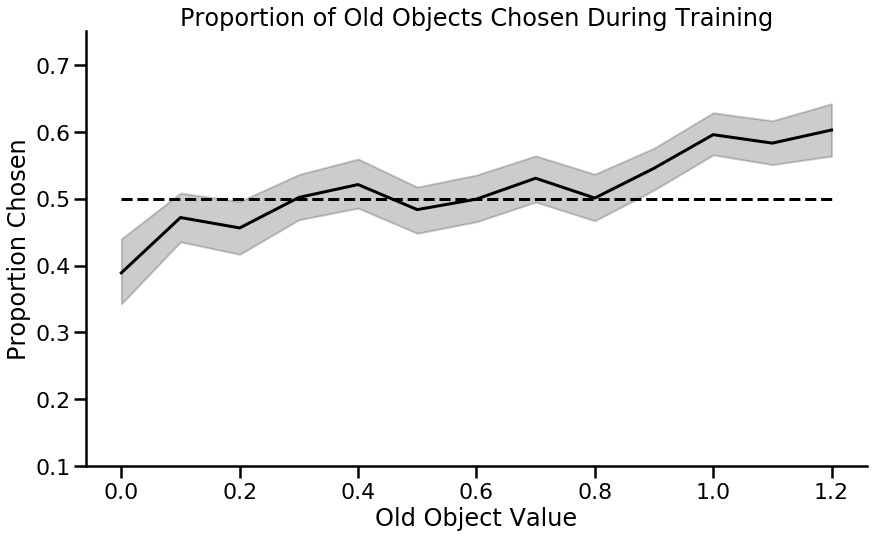

In [21]:
plt.figure(figsize=(14,8))
a = sns.lineplot(x="earned",y="prop_ep_chosen",palette="bone",hue="old_chosen",
                 data=train_ep_data[train_ep_data.old_chosen == True]);
a.legend_.remove()
plt.plot((0,1.2),(0.5,0.5),'k--');
a.set_ylim([0.1,0.75])
a.set_title("Proportion of Old Objects Chosen During Training")
a.set_xlabel("Old Object Value")
a.set_ylabel("Proportion Chosen")
sns.despine()

High value old objects are chosen more frequently

 # Test Phase Analysis
 ---
 1. Question 1
 2. Question 2

### What do participants generally choose during test?

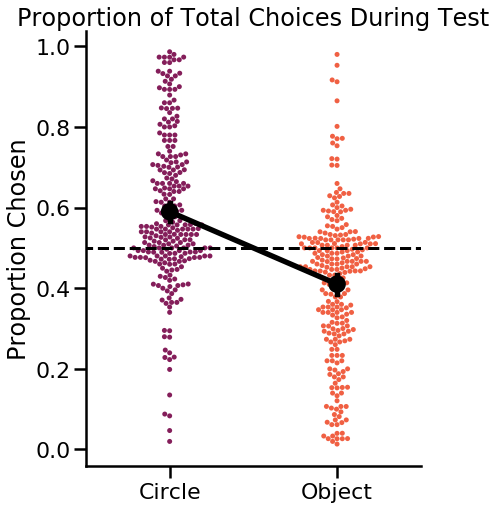

In [31]:
conditions = [(test_data['choice'] == 'orange') | (test_data['choice'] == 'blue'),
              (test_data['choice'] == 'object')]
outlabels = ['circle','object']
test_data['grp_choice'] = np.select(conditions, outlabels, default='black')

test_choice_data = getChoiceData(in_data=test_data,grp_variable='grp_choice')

plt.figure(figsize=(6,8))
sns.pointplot(x="choice",y="prop_chosen",color='k',data=test_choice_data,scale=1.0)
a = sns.swarmplot(x="choice",y="prop_chosen",data=test_choice_data,zorder=0,palette="rocket")
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Total Choices During Test")
a.set_ylabel("Proportion Chosen")
a.set_xticklabels(["Circle","Object"])
a.set_xlabel("")
plt.show()

### Does choice preference within each option mirror training?

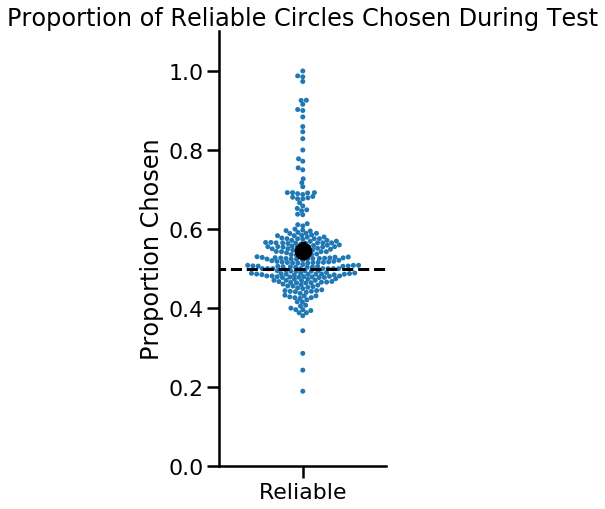

In [32]:
data4plot = test_data[(test_data.choice == "orange") | (test_data.choice == "blue")]

test_choice_data = getChoiceData(in_data=data4plot,grp_variable='choice')

plt.figure(figsize=(3,8))
sns.pointplot(x="choice",y="prop_chosen",color='k',data=test_choice_data[test_choice_data.choice == "blue"],scale=1.0)
a = sns.swarmplot(x="choice",y="prop_chosen",data=test_choice_data[test_choice_data.choice == "blue"],zorder=0)
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Reliable Circles Chosen During Test")
a.set_ylabel("Proportion Chosen")
a.set_xlabel("")
a.set_xticklabels(["Reliable"])
a.set_ylim([0,1.1])
plt.show()

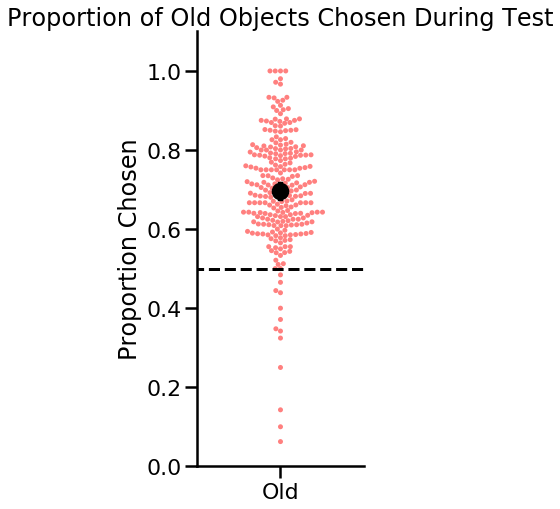

In [33]:
data4plot = test_data[test_data.choice == "object"]

test_choice_data = getChoiceData(in_data=data4plot,grp_variable='old_trial')

plt.figure(figsize=(3,8))
sns.pointplot(x="choice",y="prop_chosen",color='k',data=test_choice_data[test_choice_data.choice == True],scale=1.0)
a = sns.swarmplot(x="choice",y="prop_chosen",data=test_choice_data[test_choice_data.choice == True],zorder=0,palette="spring")
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Old Objects Chosen During Test")
a.set_ylabel("Proportion Chosen")
a.set_xticklabels(["Old"])
a.set_xlabel("")
a.set_ylim([0,1.1])
plt.show()

In [34]:
old_data = get_old_test(test_data=test_data )
print("N = %s"%(len(old_data.subjectID.unique())))

N = 250


### Higher valued old objects are chosen more frequently

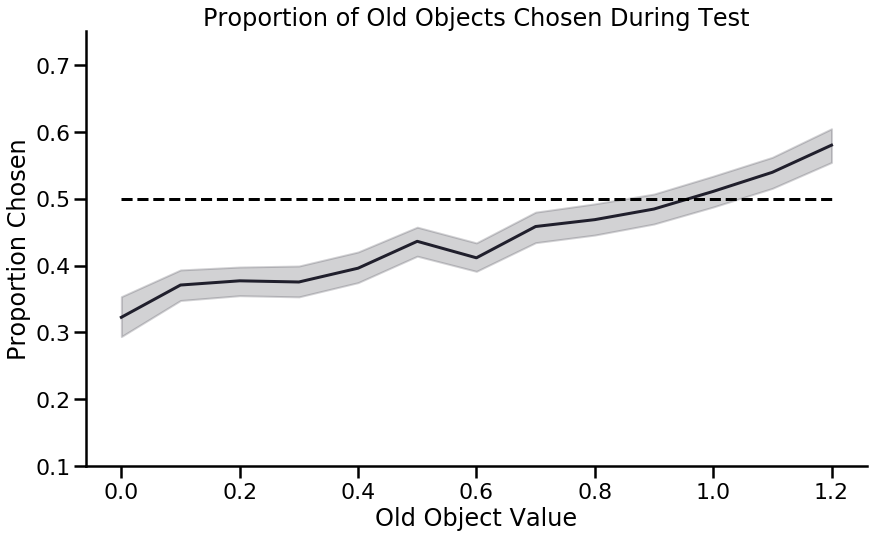

In [43]:
plt.figure(figsize=(14,8))
f = sns.lineplot(x="old_value",y="old_chosen",
                 data=old_data,color=sns.color_palette("bone")[0])
sns.despine()
f.set_title("Proportion of Old Objects Chosen During Test")
f.set_xlabel("Old Object Value")
f.set_ylabel("Proportion Chosen")
f.set_ylim([0.1,0.75])
f.axes.plot((0,1.2),(0.5,0.5),'k--'); plt.show()

### Does incremental reliability affect episodic choice?

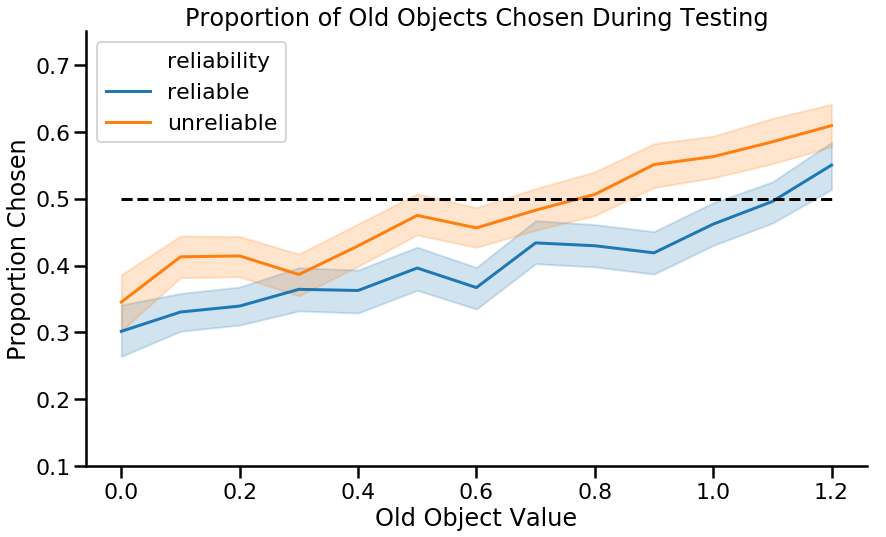

In [45]:
plt.figure(figsize=(14,8))
f = sns.lineplot(x="old_value",y="old_chosen",hue="reliability",data=old_data,
             hue_order=['reliable','unreliable'])
sns.despine()
f.set_title("Proportion of Old Objects Chosen During Testing")
f.set_xlabel("Old Object Value")
f.set_ylabel("Proportion Chosen")
f.set_ylim([0.1,0.75])
f.axes.plot((0,1.2),(0.5,0.5),'k--'); plt.show()

Old objects are more likely to be chosen when the incremental option is unreliable

In [47]:
from bambi import Model
old_data['reliability_dummy'] = old_data['reliability'].apply(dummy_code_reliability)
bambi_model = Model(old_data)

In [48]:
results = bambi_model.fit("old_chosen ~ n_blurs + old_value*reliability",
                          random='1|subjectID',
                          family='bernoulli',
                          samples=2000,
                          chains=4)

/usr/local/lib/python3.7/site-packages/bambi/models.py:228: UserWarning: Modeling the probability that old_chosen=='1'
  self.y.name, str(self.clean_data[self.y.name].iloc[event])))
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 14,250:  64%|██████▍   | 32180/50000 [02:15<01:15, 237.15it/s]
Convergence achieved at 32200
Interrupted at 32,199 [64%]: Average Loss = 22,517
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|subjectID_offset, 1|subjectID_sd, old_value:reliability, old_value, n_blurs, reliability, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [07:42<00:00, 12.37draws/s]
The number of effective samples is smaller than 25% for some parameters.


### There are strong main effects of value and reliability but no interaction (within 90% HDI but not 95%)

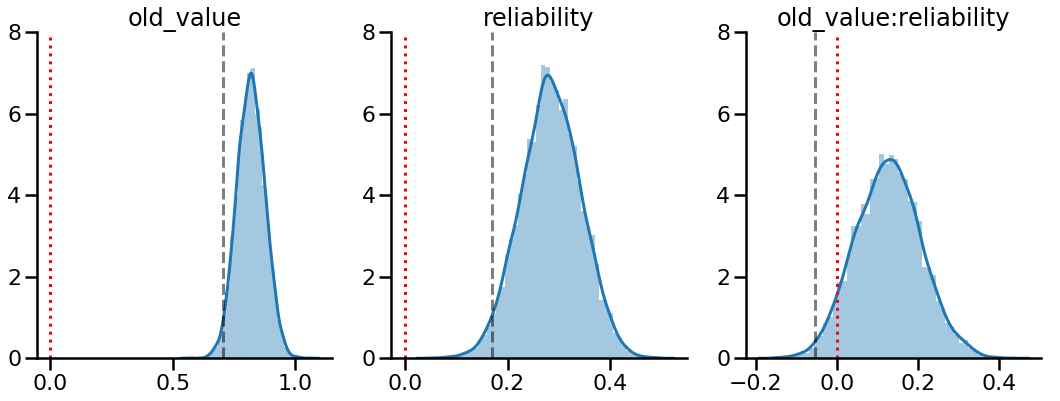

In [49]:
plotLogisticModelOut(bambi_model)

### Do these effects depend upon successfully learning which circle is reliable?

In [51]:
prop_reliable = bin5_train_inc_data[(bin5_train_inc_data["choice"] == "blue") & (bin5_train_inc_data["bin"] == 4)]
prop_learned = []
for pid in old_data.subjectID.unique():
    n_old = len(old_data[old_data.subjectID == pid])
    pid_rel = prop_reliable[prop_reliable.subjectID == pid].prop_inc_chosen.iloc[0]
    prop_learned.append([pid_rel] * n_old)
prop_learned = [i for j in prop_learned for i in j]
old_data['inc_learned'] = prop_learned

median_val = np.median(old_data['inc_learned'])

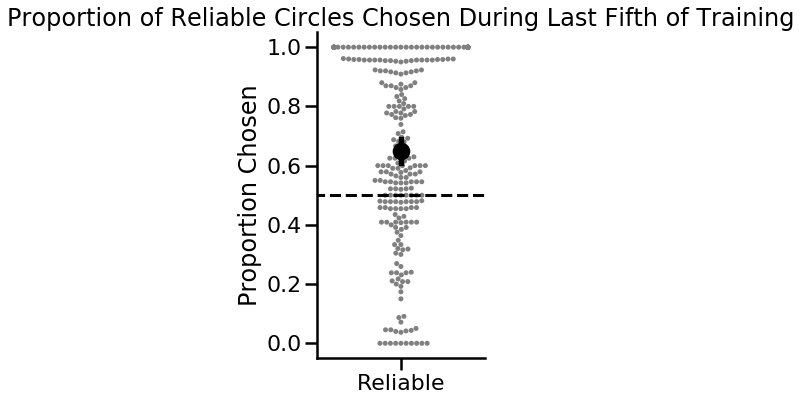

In [59]:
plt.figure(figsize=(3,6))
sns.pointplot(x="bin",y="prop_inc_chosen",color='k',data=prop_reliable)
a = sns.swarmplot(x="bin",y="prop_inc_chosen",color='grey',data=prop_reliable,zorder=0)
sns.despine(trim=False)
a.plot((-1,6),(0.5,0.5),'k--')
a.set_title("Proportion of Reliable Circles Chosen During Last Fifth of Training")
a.set_ylabel("Proportion Chosen")
a.set_xticklabels(["Reliable"])
a.set_xlabel("")
plt.show()

In [56]:
median_val

0.6296296296296297

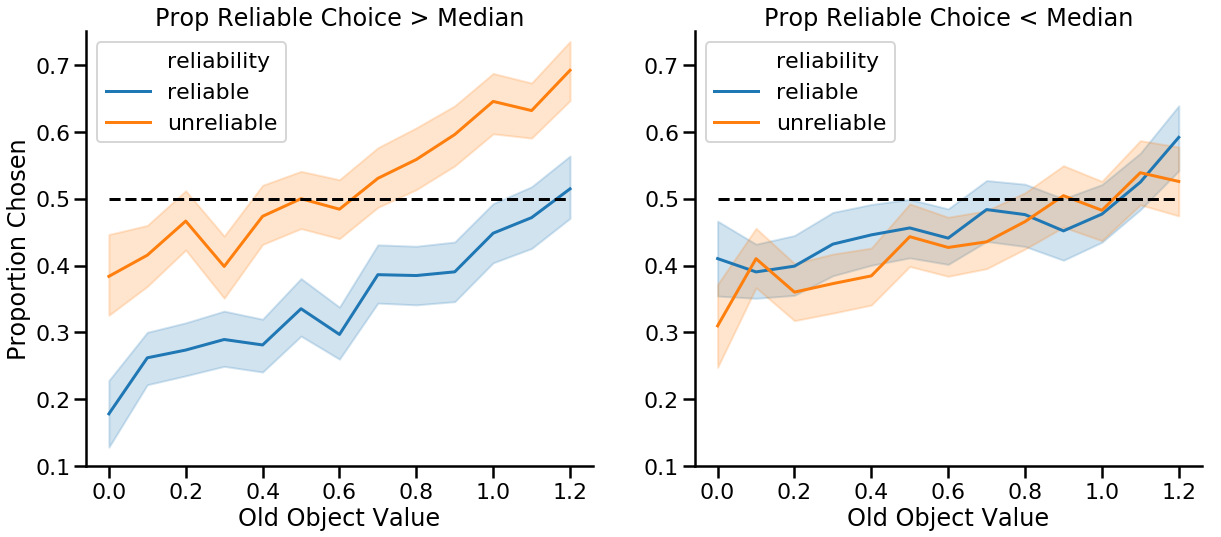

In [78]:
f, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(x="old_value",y="old_chosen",hue="reliability",data=old_data[old_data.inc_learned >= median_val],
             hue_order=['reliable','unreliable'],ax=axes[0])
sns.lineplot(x="old_value",y="old_chosen",hue="reliability",data=old_data[old_data.inc_learned <= median_val],
             hue_order=['reliable','unreliable'],ax=axes[1])
for i_ax, ax in enumerate(axes):
    ax.set_xlabel("Old Object Value")
    if i_ax == 0:
        ax.set_title("Prop Reliable Choice > Median")
        ax.set_ylabel("Proportion Chosen")
    else:
        ax.set_title("Prop Reliable Choice < Median")
        ax.set_ylabel("")
    ax.set_ylim([0.1,0.75])
    ax.plot((0,1.2),(0.5,0.5),'k--')
    sns.despine(ax=ax)


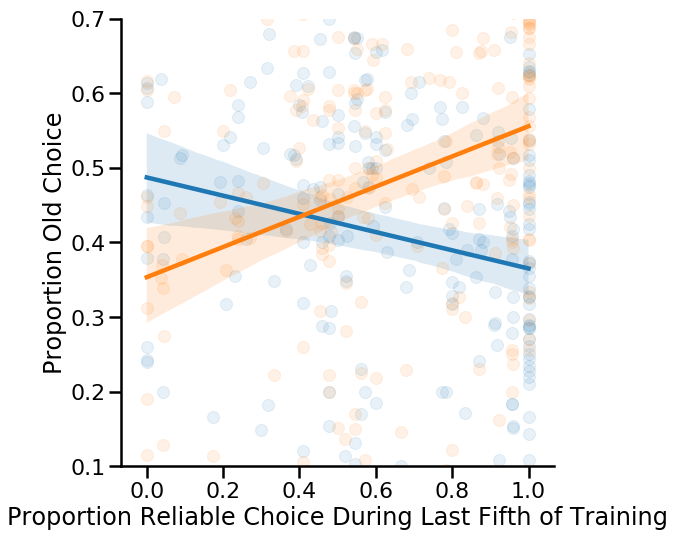

In [79]:
collapsed_df = old_data.groupby(["subjectID","reliability"]).old_chosen.mean().reset_index(name="old_chosen")
collapsed_df["inc_learned"] = old_data.groupby(["subjectID","reliability"]).inc_learned.mean().reset_index(name="inc_learned")["inc_learned"]

f = sns.lmplot(x="inc_learned",y="old_chosen",data=collapsed_df,scatter_kws={"alpha":0.1},
               hue="reliability",truncate=True, size=8,legend=False);
f.axes[0][0].set_xlabel("Proportion Reliable Choice During Last Fifth of Training");
f.axes[0][0].set_ylabel("Proportion Old Choice");
f.axes[0][0].set_ylim([0.1,0.7]);

The direction of the reliability effect depends on the circle participants think is reliable

### Are participants also more likely to false alarm when the incremental signal is unreliable?

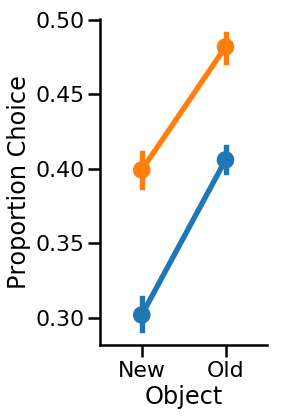

In [84]:
test_data = addColumns4Plotting(test_data)
plt.figure(figsize=(3,6))
f = sns.pointplot(x="old_trial",y="object_chosen",hue="reliability",data=test_data,legend_out=True)
f.legend_.remove()
f.set_xticklabels(["New","Old"])
f.set_ylabel("Proportion Choice")
f.set_xlabel("Object")
sns.despine(trim=False);

In [89]:
object_model = Model(test_data)
object_results = object_model.fit("object_chosen ~ old_trial*reliability",
                                  random='1|subjectID',
                                  samples=2000,
                                  chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 23,334:  71%|███████   | 35585/50000 [01:51<00:45, 318.45it/s]   
Convergence achieved at 35600
Interrupted at 35,599 [71%]: Average Loss = 63,883
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [object_chosen_sd, 1|subjectID_offset, 1|subjectID_sd, old_trial:reliability, reliability, old_trial, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [09:04<00:00, 18.37draws/s]
The number of effective samples is smaller than 10% for some parameters.


### There are strong main effects of whether a trial is old and reliability as well as a weak interaction

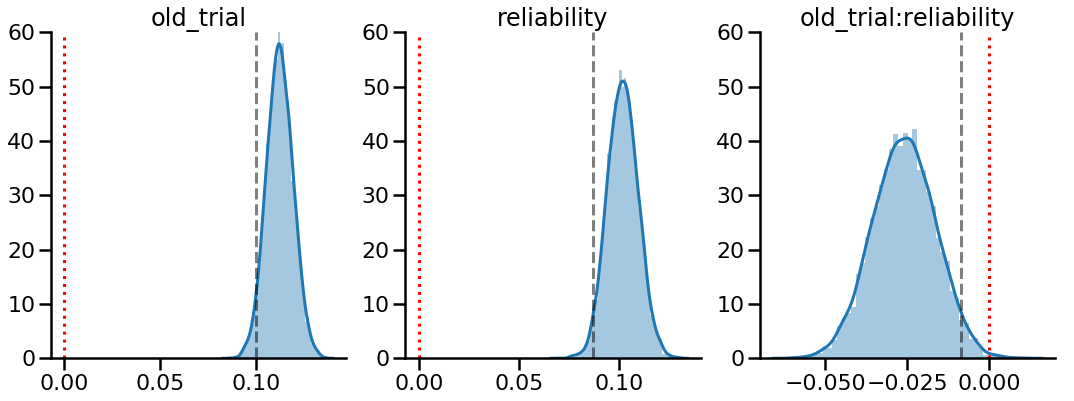

In [94]:
import pymc3 as pm
pm_trace = object_model.backend.trace

f, axes = plt.subplots(1,3,figsize=(18,6))

variables_to_plot = ['old_trial','reliability','old_trial:reliability']
for i_var, var in enumerate(variables_to_plot):

    x_lower = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][0]
    x_upper = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][1]

    sns.distplot(np.reshape(pm_trace[var],8000),ax=axes[i_var])

    if i_var == 2:
        x_lower = x_upper
    axes[i_var].plot((x_lower,x_lower),(0,60),'k--',alpha=0.5)
    axes[i_var].plot((0,0),(0,60),'r:');

    axes[i_var].set_title(var)
    axes[i_var].set_ylim(0,60)

    sns.despine(trim=False)

### Do participants show greater dprime for the unreliable condition and higher value old objects?


### Calculating dprime for this experiment


**Across all values:**

---
\begin{align}
CR = P(New|New) \\
FA = P(Old|New)
\end{align}

\begin{equation*}
FARate =
\frac{FA}{FA + CR}
\end{equation*}

**For each value v:**

---
\begin{align}
Hit_v = P(Old_v|Old_v) \\
Miss_v = P(New|Old_v)
\end{align}

\begin{equation*}
HitRate_v =
\frac{Hit_v}{Hit_v + Miss_v}
\end{equation*}

\begin{equation*}
d'_v =
z(HitRate_v) - z(FARate)
\end{equation*}

In [121]:
prop_learned = []
for pid in test_data.subjectID.unique():
    n_test = len(test_data[test_data.subjectID == pid])
    pid_rel = prop_reliable[prop_reliable.subjectID == pid].prop_inc_chosen.iloc[0]
    prop_learned.append([pid_rel] * n_test)
prop_learned = [i for j in prop_learned for i in j]
test_data['inc_learned'] = prop_learned
signal_detection_df = getDPrimePerCondition(test_data)

### Does incremental reliability affect sensitivity to old objects?

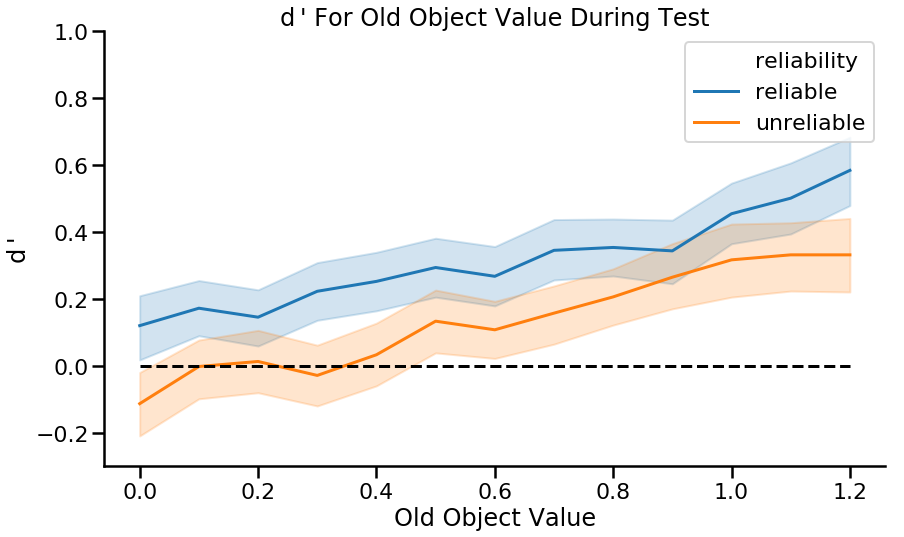

In [96]:
plt.figure(figsize=(14,8))
f = sns.lineplot(x="old_value",y="dprime",hue="reliability",data=signal_detection_df)
sns.despine()
f.set_title("d ' For Old Object Value During Test")
f.set_xlabel("Old Object Value")
f.set_ylabel("d '")
f.set_ylim([-0.3,1.0])
f.axes.plot((0,1.2),(0,0),'k--'); plt.show()

In [99]:
dprime_model = Model(signal_detection_df,dropna=True)
dprime_results = dprime_model.fit("dprime ~ old_value*reliability",
                                  random='1|pid',
                                  samples=2000,
                                  chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 5,858.5:  58%|█████▊    | 28930/50000 [00:35<00:25, 822.09it/s]
Convergence achieved at 29000
Interrupted at 28,999 [57%]: Average Loss = 10,818
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [dprime_sd, 1|pid_offset, 1|pid_sd, old_value:reliability, old_value, reliability, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [02:11<00:00, 75.96draws/s]
The number of effective samples is smaller than 25% for some parameters.


### There are strong main effects of value and reliability and no interaction

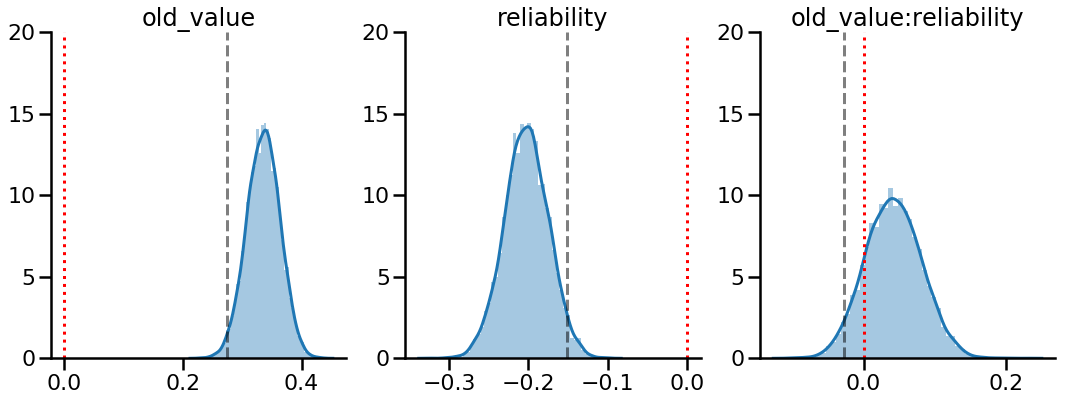

In [102]:
import pymc3 as pm
pm_trace = dprime_model.backend.trace

f, axes = plt.subplots(1,3,figsize=(18,6))

variables_to_plot = ['old_value','reliability','old_value:reliability']
for i_var, var in enumerate(variables_to_plot):

    x_lower = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][0]
    x_upper = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][1]

    sns.distplot(np.reshape(pm_trace[var],8000),ax=axes[i_var])

    if i_var == 1:
        x_lower = x_upper
    axes[i_var].plot((x_lower,x_lower),(0,20),'k--',alpha=0.5)
    axes[i_var].plot((0,0),(0,20),'r:');

    axes[i_var].set_title(var)
    axes[i_var].set_ylim(0,20)

    sns.despine(trim=False)

 ### Do these effects on dprime depend upon successfully learning which circle is reliable?

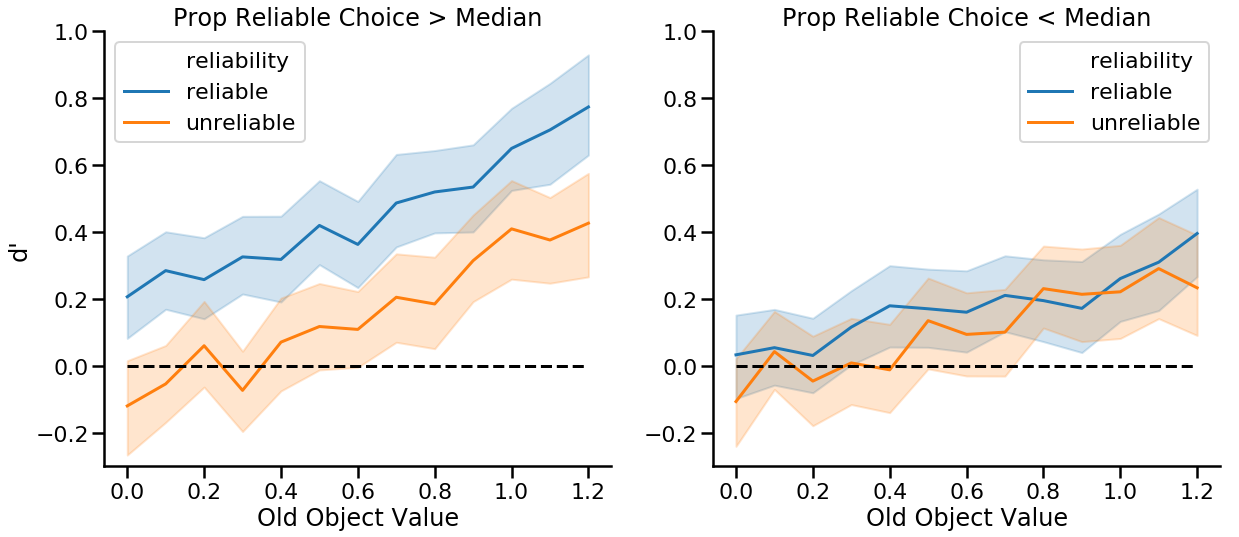

In [104]:
signal_detection_best = getDPrimePerCondition(test_data[test_data.inc_learned >= median_val])
signal_detection_worst = getDPrimePerCondition(test_data[test_data.inc_learned <= median_val])

f, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(x="old_value",y="dprime",hue="reliability",data=signal_detection_best,
             hue_order=['reliable','unreliable'],ax=axes[0])
sns.lineplot(x="old_value",y="dprime",hue="reliability",data=signal_detection_worst,
             hue_order=['reliable','unreliable'],ax=axes[1])
for i_ax, ax in enumerate(axes):
    ax.set_xlabel("Old Object Value")
    if i_ax == 0:
        ax.set_title("Prop Reliable Choice > Median")
        ax.set_ylabel("d'")
    else:
        ax.set_title("Prop Reliable Choice < Median")
        ax.set_ylabel("")
    ax.set_ylim([-0.3,1.0])
    ax.plot((0,1.2),(0,0),'k--')
    sns.despine(ax=ax)


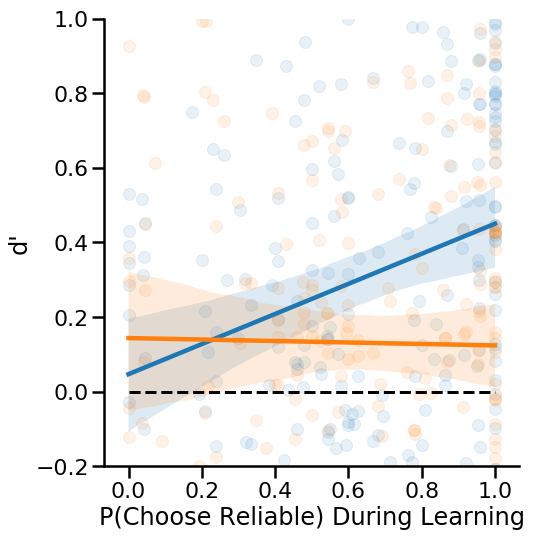

In [135]:
collapsed_df = signal_detection_df.groupby(["pid","reliability"]).dprime.mean().reset_index(name="dprime")
collapsed_df["inc_learned"] = signal_detection_df.groupby(["pid","reliability"]).inc_learned.mean().reset_index(name="inc_learned")["inc_learned"]

f = sns.lmplot(x="inc_learned",y="dprime",data=collapsed_df,scatter_kws={"alpha":0.1},
               hue="reliability",truncate=True, size=8,legend=False);
f.axes[0][0].set_xlabel("P(Choose Reliable) During Learning");
f.axes[0][0].set_ylabel("d'");
f.axes[0][0].set_ylim([-0.2,1.0]);
f.axes[0][0].plot((0,1.0),(0,0),'k--');

Participants only show an effect of d' if they have learned which circle is reliable

### Do participants show greater response bias/decision threshold for the unreliable condition and higher value old objects?

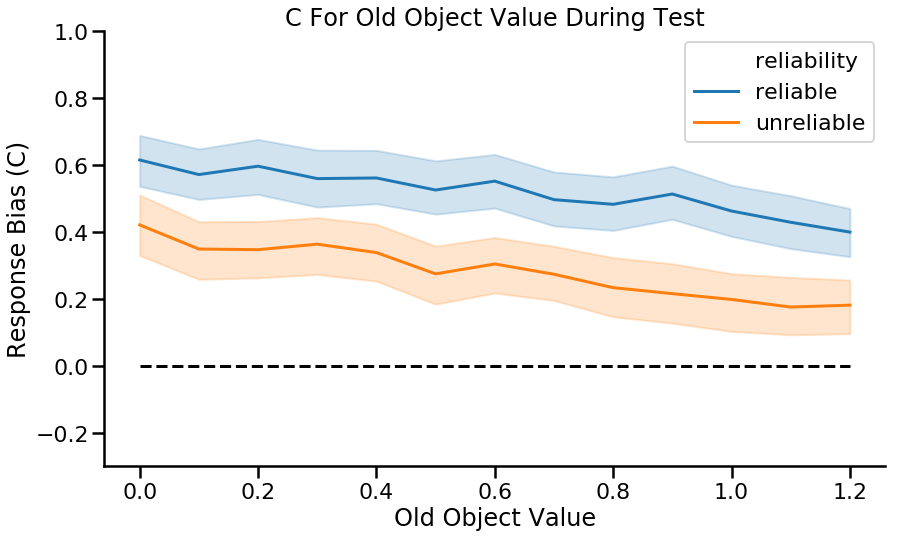

In [125]:
plt.figure(figsize=(14,8))
f = sns.lineplot(x="old_value",y="response_bias",hue="reliability",data=signal_detection_df)
sns.despine()
f.set_title("C For Old Object Value During Test")
f.set_xlabel("Old Object Value")
f.set_ylabel("Response Bias (C)")
f.set_ylim([-0.3,1.0])
f.axes.plot((0,1.2),(0,0),'k--');

In [126]:
c_model = Model(signal_detection_df,dropna=True)
c_results = c_model.fit("response_bias ~ old_value*reliability",
                        random='1|pid',
                        samples=2000,
                        chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 3,795.4:  59%|█████▉    | 29671/50000 [00:35<00:24, 840.97it/s] 
Convergence achieved at 29700
Interrupted at 29,699 [59%]: Average Loss = 10,018
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [response_bias_sd, 1|pid_offset, 1|pid_sd, old_value:reliability, old_value, reliability, Intercept]
Sampling 4 chains: 100%|██████████| 10000/10000 [01:30<00:00, 109.89draws/s]
The number of effective samples is smaller than 10% for some parameters.


### There are strong main effects of value and reliability and no interaction

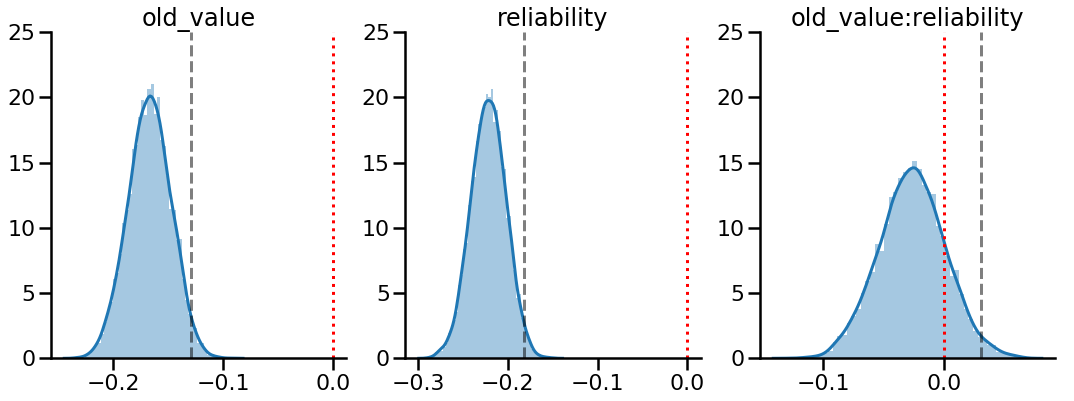

In [132]:
import pymc3 as pm
pm_trace = c_model.backend.trace

f, axes = plt.subplots(1,3,figsize=(18,6))

variables_to_plot = ['old_value','reliability','old_value:reliability']
for i_var, var in enumerate(variables_to_plot):

    x_lower = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][0]
    x_upper = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][1]

    sns.distplot(np.reshape(pm_trace[var],8000),ax=axes[i_var])

    x_lower = x_upper
    axes[i_var].plot((x_lower,x_lower),(0,25),'k--',alpha=0.5)
    axes[i_var].plot((0,0),(0,25),'r:');

    axes[i_var].set_title(var)
    axes[i_var].set_ylim(0,25)

    sns.despine(trim=False)

 ### Do these effects on reponse bias depend upon successfully learning which circle is reliable?

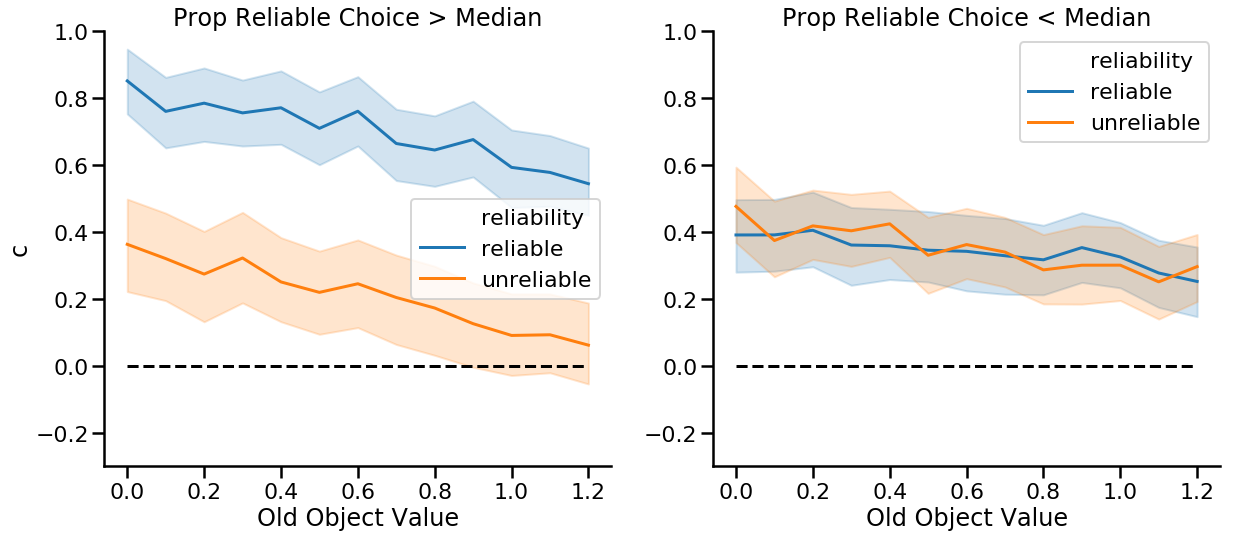

In [133]:
f, axes = plt.subplots(1,2,figsize=(20,8))
sns.lineplot(x="old_value",y="response_bias",hue="reliability",data=signal_detection_best,
             hue_order=['reliable','unreliable'],ax=axes[0])
sns.lineplot(x="old_value",y="response_bias",hue="reliability",data=signal_detection_worst,
             hue_order=['reliable','unreliable'],ax=axes[1])
for i_ax, ax in enumerate(axes):
    ax.set_xlabel("Old Object Value")
    if i_ax == 0:
        ax.set_title("Prop Reliable Choice > Median")
        ax.set_ylabel("c")
    else:
        ax.set_title("Prop Reliable Choice < Median")
        ax.set_ylabel("")
    ax.set_ylim([-0.3,1.0])
    ax.plot((0,1.2),(0,0),'k--')
    sns.despine(ax=ax)

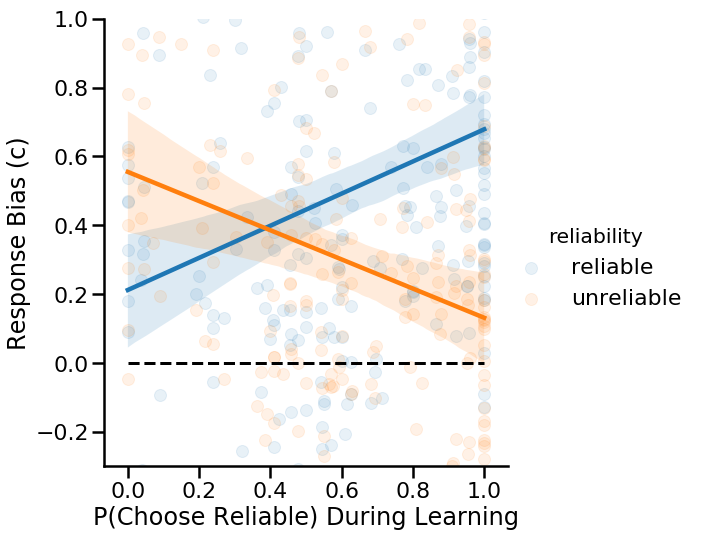

In [134]:
collapsed_df = signal_detection_df.groupby(["pid","reliability"]).response_bias.mean().reset_index(name="response_bias")
collapsed_df["inc_learned"] = signal_detection_df.groupby(["pid","reliability"]).inc_learned.mean().reset_index(name="inc_learned")["inc_learned"]

f = sns.lmplot(x="inc_learned",y="response_bias",data=collapsed_df,
           hue="reliability",truncate=True,size=8,scatter_kws={"alpha":0.1});
f.axes[0][0].set_xlabel("P(Choose Reliable) During Learning");
f.axes[0][0].set_ylabel("Response Bias (c)");
f.axes[0][0].set_ylim([-0.3,1.0]);
f.axes[0][0].plot((0,1),(0,0),'k--'); plt.show()

The direction of the reliability effect depends on the circle participants think is reliable

# Summary
1.

2.

3.

4.

In [120]:
# Importing packages
# import rpy2
# %matplotlib inline
# %load_ext rpy2.ipython
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

def process_data():
    
    global exclude_response
    global exclude_blur

    # these parameters exclude very few people
    exclude_response = .6
    exclude_blur = 100
    # Load the screentime data
    int_data, exclude_pids = loadData(dType="interaction")
    exclude_pids = map(int,exclude_pids)
    # Load the experiment data
    data = loadData(dType="experiment",exclude_old=False)[0]

    n_blurs = int_data[int_data.event == "blur"] \
                .groupby(['subjectID','event']) \
                .size() \
                .reset_index(name="n_blurs")

    def get_blurs(x):
        if str(x) in n_blurs.subjectID.unique():
            pid_blurs = n_blurs[n_blurs.subjectID == str(x)].n_blurs.iloc[0]
            return pid_blurs
        else:
            # if not there, then they don't have any blurs
            return 0

    data['n_blurs'] = data['subjectID'].apply(get_blurs)
    
    return data

def get_old_test(test_data=None,get_old=True):
    propResps = {'pid':[],'propResp':[]}
    for pid in data.subjectID.unique():
        pid_train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        pid_test_data = data[(data.test_part == 'test') & (data.subjectID == pid)]

        bonus = pid_test_data.bonus.mean()

        nTrials = len(pid_train_data)+len(pid_test_data)

        cleaned_train = pid_train_data[pid_train_data.choice != 'no_response']
        cleaned_test = pid_test_data[pid_test_data.choice != 'no_response']

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials
        propResps['pid'].append(pid)
        propResps['propResp'].append(proportionResponse)
    propResps = pd.DataFrame.from_dict(propResps)

    old_data = test_data[test_data.old_trial == get_old]

    def binarize_old_choice(row):
        if row.choice == "object":
            return 1#True
        else:
            return 0#False

    def get_reliability(row):
        if row.deck_type == "blue":
            return "reliable"
        elif row.deck_type == "orange":
            return "unreliable"

    def get_prop_response(row):
        prop_response = propResps[propResps.pid == row.subjectID].propResp.iloc[0]
        return prop_response

    old_data['old_chosen'] = old_data.apply(lambda row: binarize_old_choice(row),axis=1)
    old_data['reliability'] = old_data.apply(lambda row: get_reliability(row),axis=1)
    old_data['old_value'] = old_data['old_value'].astype('float')
    old_data['propResponse'] = old_data.apply(lambda row: get_prop_response(row),axis=1)

    old_data = old_data[old_data.propResponse >= 0.6]

    return old_data

def plotGenerativeDists(nTimepoints):
    reliableDist = np.round_(np.random.normal(0.6,0.05,nTimepoints),decimals=2)
    unreliableDist = np.round_(np.random.normal(0.6,0.2,nTimepoints),decimals=2)
    objectDist = np.round_(np.random.uniform(0,1.2,nTimepoints),decimals=2)

    sns.distplot(reliableDist)
    sns.despine()
    plt.text(0.7,7,'Reliable',color='blue')
    sns.distplot(unreliableDist)
    plt.text(0.7,2.2,'Unreliable',color='orange')
    
    obj_col = sns.color_palette(palette="rocket")[0]
    f = sns.distplot(objectDist,kde=True,kde_kws={"cut":0},
                     color=obj_col,bins=10)
    plt.text(0.9,1.1,'Object',color=obj_col)
    
    plt.title('Outcome Generative Distributions')
    f.set_xlim([0,1.2])

    
# def loadData(dType=None,dataDir="/Users/jonathan/shohamylab/jspych-exps/data/exp5",fileType="stateData"):
#     data, exclude_pids = [], [] 
#     dataFiles = [d for d in os.listdir(dataDir) if dType in d]
#     for f in dataFiles:
#         subData = pd.read_csv(os.path.join(dataDir,f))
#         if dType == "interaction":
#             if len(subData[subData.event == 'blur']) >= exclude_blur:
#                 exclude_pids.append(f.split('_')[0])
#             subData['subjectID'] = [f.split('_')[0]] * len(subData)
#         elif dType == "experiment":
#             bonus = float(f.split('_')[2].replace('bonus',''))
#             subData['bonus'] = [bonus] * len(subData)
#         data.append(subData)
#     data = pd.concat(data,ignore_index=True)
#     return data, exclude_pids

def loadData(dType=None,dataDir="/Users/jonathan/shohamylab/jspych-exps/data/exp5",fileType="stateData",exclude_old=False):
    from datetime import datetime
    data, exclude_pids = [], [] 
    dataFiles = [d for d in os.listdir(dataDir) if dType in d]
    for f in dataFiles:
        subData = pd.read_csv(os.path.join(dataDir,f))
        date = f.split("_")[1]
        readable_date = datetime.fromtimestamp(int(date)/1000).strftime('%m-%d')
        if dType == "interaction":
            if len(subData[subData.event == 'blur']) >= exclude_blur:
                exclude_pids.append(f.split('_')[0])
            subData['subjectID'] = [f.split('_')[0]] * len(subData)
        elif dType == "experiment":
            bonus = float(f.split('_')[2].replace('bonus',''))
            subData['bonus'] = [bonus] * len(subData)
        if exclude_old and readable_date not in ['08-20','08-21']:
            data.append(subData)
        elif not exclude_old:
            data.append(subData)
    data = pd.concat(data,ignore_index=True)
    return data, exclude_pids

def aggregateTestData(data=None, exclude_pids=None):
    
    pids = data.subjectID.unique()

    dOut = {'reliability':[],'value':[],'pOld':[],
            'pid':[],'bonus':[],'propResponse':[],
            'mean_rt':[],'n_rel':[],'n_unrel':[],'n_circle':[],'n_object':[],
            'n_old_high':[],'n_old_low':[],'n_new':[],'rt_old':[],'rt_new':[],
           'rt_rel':[],'rt_unrel':[],'rt_circle':[],'rt_object':[],'n_old_chosen':[]}
    for pid in pids:

        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        test_data = data[(data.test_part == 'test') & (data.subjectID == pid)]

        bonus = test_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response']
        cleaned_test = test_data[test_data.choice != 'no_response']
        
        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        old_test = cleaned_test[cleaned_test.old_trial == True]
        old_chosen = old_test[old_test.choice == 'object']

        if proportionResponse >= exclude_response and pid not in exclude_pids:

            colors = ['blue','orange']
            values = ['1.20','0.00']

            for c in colors:
                for v in values:
                    nTotal = len(old_test[(old_test.deck_type == c) & \
                                          (old_test.old_value == v)])
                    nChosen = len(old_chosen[(old_chosen.deck_type == c) & \
                                             (old_chosen.old_value == v)])
                    
                    # number of object trials chosen
                    nOldHigh = len(cleaned_test[(cleaned_test.choice == "object") & \
                                                (cleaned_test.old_trial == True) & \
                                                (cleaned_test.old_value == '1.20')])
                    nOldLow = len(cleaned_test[(cleaned_test.choice == "object") & \
                                               (cleaned_test.old_trial == True) & \
                                               (cleaned_test.old_value == '0.00')])

                    nNew = len(cleaned_test[(cleaned_test.choice == "object") & \
                                            (cleaned_test.old_trial == False)])
                    nObject = nOldHigh+nOldLow+nNew
                    
                    rtOld = cleaned_test[(cleaned_test.choice == "object") & \
                                            (cleaned_test.old_trial == True)].rt.mean()
                    rtNew = cleaned_test[(cleaned_test.choice == "object") & \
                                            (cleaned_test.old_trial == False)].rt.mean()
                    rtObject = rtOld+rtNew
                    
                    # number of circle trials chosen
                    nReliable = len(cleaned_test[(cleaned_test.choice == "blue")])
                    nUnreliable = len(cleaned_test[(cleaned_test.choice == "orange")])
                    nCircle = nReliable+nUnreliable
            
                    rtReliable = cleaned_test[cleaned_test.choice == "blue"].rt.mean()
                    rtUnreliable = cleaned_test[cleaned_test.choice == "orange"].rt.mean()
                    rtCircle = np.mean([rtReliable,rtUnreliable])
                    
                    nTotalChoices = nObject+nCircle
                    # set in terms of proportions
                    nObject = nObject/nTotalChoices
                    nNew = nNew/nTotalChoices
                    nOldHigh = nOldHigh/nTotalChoices
                    nOldLow = nOldLow/nTotalChoices
                    nCircle = nCircle/nTotalChoices
                    nReliable = nReliable/nTotalChoices
                    nUnreliable = nUnreliable/nTotalChoices
                                        
                    # number of old chosen/number of total old trials
                    pOld = nChosen/nTotal
                    nOldChosen = nChosen
                    
                    # mean RT for when the old items are chosen
                    meanRT = old_test[(old_test.deck_type == c) & \
                                    (old_test.old_value == v)].rt.mean()
                    
                    if c == 'blue':
                        rel = 'reliable'
                    else:
                        rel = 'unreliable'

                    if v == '1.20':
                        val = 'high'
                    else:
                        val = 'low'

                    dOut['reliability'].append(rel)
                    dOut['value'].append(val)
                    dOut['pOld'].append(pOld)
                    dOut['pid'].append(pid)
                    dOut['bonus'].append(bonus)
                    dOut['propResponse'].append(proportionResponse)
                    dOut['mean_rt'].append(meanRT)
                    dOut['n_rel'].append(nReliable)
                    dOut['n_unrel'].append(nUnreliable)
                    dOut['n_circle'].append(nCircle)
                    dOut['n_old_high'].append(nOldHigh)
                    dOut['n_old_low'].append(nOldLow)
                    dOut['n_new'].append(nNew)
                    dOut['n_object'].append(nObject)
                    dOut['n_old_chosen'].append(nOldChosen)
                    dOut['rt_rel'].append(rtReliable)
                    dOut['rt_unrel'].append(rtUnreliable)
                    dOut['rt_circle'].append(rtCircle)
                    dOut['rt_old'].append(rtOld)
                    dOut['rt_new'].append(rtNew)
                    dOut['rt_object'].append(rtObject)


    dOut = pd.DataFrame.from_dict(dOut)
    return dOut

def binChoices(data=None, n_bins=None, trialType=None):
    
    pids = data.subjectID.unique()
    
    relOut = []
    for pid in pids:

        test_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]

        bonus = train_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response'].reset_index()
        cleaned_test = test_data[test_data.choice != 'no_response'].reset_index()

        cleaned_train.loc[cleaned_train['choice'].str.contains('object'), 'choice'] = 'object'

        currBin = 0
        binWidth = int(len(cleaned_train)/n_bins)
        bins = []
        for i_row, row in cleaned_train.iterrows():
            if i_row % binWidth == 0:
                if currBin != n_bins:
                    currBin+=1

            bins.append(currBin)
        cleaned_train['bin'] = bins

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        if proportionResponse >= exclude_response and pid not in exclude_pids:
            if trialType == "reliability":
                rel_chosen = cleaned_train[cleaned_train.choice != "object"] \
                .groupby(['bin','choice']).size().reset_index(name="num_chosen")
            elif trialType == "object":
                rel_chosen = cleaned_train[(cleaned_train.choice == "object") &
                                           (cleaned_train.old_trial == True)] \
                .groupby(['bin','earned','old_chosen']).size().reset_index(name="num_chosen")
            rel_chosen['pid'] = [pid] * len(rel_chosen)
            relOut.append(rel_chosen)

    relOut = pd.concat(relOut)
    if trialType == "object": relOut['earned'] = relOut['earned'].convert_objects(convert_numeric=True)
    return relOut

def gen_random_performance(data=None,n_sims=None):

    # Let's try and model guessing behavior
    # e.g. how much would we expect them to earn if they were just guessing?
    import random

    test_data = data[(data.test_part == 'test')]

    random_perf = {'pid':[],'random_test':[],'actual_earnings':[]}
    for pid in test_data.subjectID.unique():

        pid_data = test_data[test_data.subjectID == pid]

        earnings = pid_data[pid_data.earned != 'none'].earned
        total_earnings = np.sum(pd.to_numeric(earnings))

        sim_earnings = []
        for sim in range(n_sims):

            test_earnings = 0

            for i_row, row in pid_data.iterrows():

                reliableSample = np.round_(np.random.normal(0.6,0.05,1),decimals=2)
                unreliableSample = np.round_(np.random.normal(0.6,0.2,1),decimals=2)

                old_val = row.old_value
                deck_type = row.deck_type

                if old_val == 'none':
                    obj_val = random.choice([0,1.2])
                elif old_val == '0.00':
                    obj_val = 0
                elif old_val == '1.20':
                    obj_val = 1.2

                if deck_type == 'blue':
                    deck_val = reliableSample[0]
                else:
                    deck_val = unreliableSample[0]

                test_earnings+=random.choice([deck_val,obj_val])

            sim_earnings.append(test_earnings)

        random_perf['pid'].append(pid)
        random_perf['random_test'].append(np.mean(sim_earnings))
        random_perf['actual_earnings'].append(total_earnings)

    random_perf = pd.DataFrame.from_dict(random_perf)

    return random_perf

def get_blurs(x):
    if str(x) in n_blurs.subjectID.unique():
        pid_blurs = n_blurs[n_blurs.subjectID == str(x)].n_blurs.iloc[0]
        return pid_blurs
    else:
        # if not there, then they don't have any blurs
        return 0

def get_relative_perf(x):
    # calculate their performance relative to what is expected based on random guessing
    rand_perf = random_perf[random_perf.pid == x].random_test.iloc[0]
    actual_earnings = random_perf[random_perf.pid == x].actual_earnings.iloc[0]
    rel_perf = (actual_earnings*0.01) - (rand_perf*0.01)
    
    return rel_perf

def melt_choice_df(variables=[],col_name="None",data_subset=None):
    
    if data_subset == 'highvalobj':
        full_data = agg_data[agg_data.bestStrategy == "choosehighold"]
    else:
        full_data = agg_data
    
    plt_data = pd.melt(full_data, id_vars=['pid'], value_vars=variables)
    plt_data = plt_data.groupby(['pid','variable']).value.mean().reset_index(name=col_name)
    
    perf = []
    for pid in plt_data.pid.unique():
        d_length = len(plt_data[plt_data.pid == pid])
        perf.append([full_data[full_data.pid == pid].performance.iloc[0]] * d_length)
    perf = [i for j in perf for i in j]
    plt_data['performance'] = perf
    
    return plt_data

def plot_choices(data=None,yVal=None,colors=None,order=None):
    
#     sns.swarmplot(x='variable',y=yVal,data=plt_data,palette=colors,order=order)

    f, axes = plt.subplots(1,2,figsize=(12,6))
    sns.pointplot(x='variable',y=yVal,data=data,
                  hue='variable',order=order,hue_order=order,
                  join=False,ax=axes[0])
    
    sns.pointplot(x='variable',y=yVal,data=data,
                  color='black',order=order,join=False,ax=axes[1])
    sns.swarmplot(x='variable',y=yVal,data=plt_data,palette=colors,order=order,ax=axes[1])

    sns.lmplot(x='performance',y=yVal,hue='variable',data=data,
               palette=colors,hue_order=order)
    
def gen_strategy(data=None,strategy=None):

    # Model object-centric choice strategy
    # Choose an object only if it is high-value old
    import random

    test_data = data[(data.test_part == 'test')]

    perf = {'pid':[],strategy:[]}
    for pid in test_data.subjectID.unique():

        pid_data = test_data[test_data.subjectID == pid]
        
        earnings = pid_data[pid_data.earned != 'none'].earned
        total_earnings = np.sum(pd.to_numeric(earnings))

        agreement = 0
        for i_row, row in pid_data.iterrows():

            old_val = row.old_value
            deck_type = row.deck_type

            if strategy == 'choosehighold':
            
                if old_val == '1.20':
                    sim_choice = 'object'
                else:
                    sim_choice = 'deck'
            
            elif strategy == 'choosehighandnew':
                if old_val == '1.20' or old_val == 'none':
                    sim_choice = 'object'
                else:
                    sim_choice = 'deck'
            
            elif strategy == 'chooseold':
                
                if old_val == '1.20' or old_val == '0.00':
                    sim_choice = 'object'
                else:
                    sim_choice = 'deck'
            
            elif strategy == 'choosecircle':
            
                sim_choice = 'deck'
            
            elif strategy == 'chooseobject':
                
                sim_choice = 'object'
                
            elif strategy == 'chooserel':
                
                if deck_type == 'blue':
                    sim_choice = 'deck'
                else:
                    sim_choice = 'object'
            
            elif strategy == 'chooseunrel':
                
                if deck_type == 'orange':
                    sim_choice = 'deck'
                else:
                    sim_choice = 'object'
            
            elif strategy == 'random':
                
                sim_choice = random.choice(['object','deck'])
            
            if sim_choice == 'object':
                if row.choice =='object':
                    agree = 1
                else:
                    agree = 0
            elif sim_choice == 'deck':
                if row.choice == 'blue' or row.choice == 'orange':
                    agree = 1
                else:
                    agree = 0
    
            agreement+=agree
 
        agreement = agreement/len(pid_data)

        perf['pid'].append(pid)
        perf[strategy].append(agreement)
        
    perf = pd.DataFrame.from_dict(perf)
    
    return perf


def plt_indiv_strategies(x=None,y=None,corr=None):
    
    r, axes = plt.subplots(1,2,figsize=(10,4))

    r = sns.regplot(y=y,x=x,data=strategies,ax=axes[0])
    r.set_xlim(0,1)
    r.set_ylim(0,1)
    if corr == "negative":
        axes[0].plot((1,1),(1,1),'k--',)
    else:
        axes[0].plot((0,1),(0,1),'k--',)

    strategies['%s - %s'%(x,y)] = strategies[y] - strategies[x]
    sns.swarmplot(strategies['%s - %s'%(x,y)],zorder=1,ax=axes[1])
    f = sns.pointplot(strategies['%s - %s'%(x,y)],color='black',zorder=2,ax=axes[1])
    f.set_ylim(-0.25,0.25)
    axes[1].plot((0,0),(-1,1),'k--')
    plt.show()
    
def get_best_strategy(strategyDf):
    global s
    s = {'pid':[],'bestStrategy':[],'value':[]}
    for pid in strategyDf.pid.unique():
        pidData = strategyDf[strategyDf.pid == pid]
        maxRow = pidData.loc[pidData.value.argmax()]
        bestStrategy = maxRow.variable
        maxValue = maxRow.value
        s['pid'].append(pid)
        s['bestStrategy'].append(bestStrategy)
        s['value'].append(maxValue)
    s = pd.DataFrame.from_dict(s)
    s1 = s.groupby('bestStrategy').size().reset_index(name='tally')
    return s1

def get_performance_by_strategy():
    s3 = []
    for pid in agg_data.pid.unique():
        pid_data = agg_data[agg_data.pid == pid]
        s3.append([strategies[strategies.pid == pid] \
                  ['choosecircle - choosehighold'].iloc[0]] * len(pid_data))
    s3 = [i for j in s3 for i in j]
    agg_data['highold - circle'] = s3


    s2 = []
    for pid in agg_data.pid.unique():
        pid_data = agg_data[agg_data.pid == pid]
        s2.append([s[s.pid == pid].bestStrategy.iloc[0]] * len(pid_data))
    s2 = [i for j in s2 for i in j]
    agg_data['bestStrategy'] = s2
    
    return agg_data

def getTestDataChoices():
    
    test_data = data[data.test_part == "test"]
    test_data = test_data[test_data.choice != 'no_response']
    
    dOut = {'pid':[],'choice_type':[],'n_chosen':[]}

    for pid in test_data.subjectID.unique():

        pid_data = test_data[test_data.subjectID == pid]
        trial_data = pid_data
        trial_data.loc[trial_data['choice'].str.contains('object'), 'choice'] = 'object'

        old_data = trial_data[trial_data.old_trial == True]

        old_chosen = old_data[old_data.choice == "object"]

        new_chosen = trial_data[(trial_data.choice == "object") & \
                                (trial_data.old_trial == False)]

        n_old_chosen = len(old_chosen)
        n_new_chosen = len(new_chosen)
        n_highold_chosen = len(old_chosen[old_chosen.earned == "1.20"])
        n_lowold_chosen = len(old_chosen[old_chosen.earned == "0.00"])
        n_unrel_chosen = len(trial_data[trial_data.choice == "blue"])
        n_rel_chosen = len(trial_data[trial_data.choice == "orange"])

        choice_values = [n_old_chosen,n_rel_chosen,n_unrel_chosen,
                         n_highold_chosen,n_lowold_chosen,n_new_chosen]
        for i, choiceType in enumerate(['n_old_chosen',
                                        'n_rel_chosen',
                                        'n_unrel_chosen',
                                        'n_highold_chosen',
                                        'n_lowold_chosen',
                                        'n_new_chosen']):


            dOut['choice_type'].append(choiceType)
            dOut['n_chosen'].append(choice_values[i])
            dOut['pid'].append(pid)

    dOut = pd.DataFrame.from_dict(dOut)
    return dOut

def plot_choice_differences(plt_type=None,task_part=None):
    if plt_type != "all":
        plt_data = train_choice_data[train_choice_data.trial_type == plt_type]
    else:
        if task_part == "test":
            plt_data = test_choice_data
        else:
            plt_data = train_choice_data

    rel_unrel_diff = np.array(plt_data[plt_data.choice_type == "n_rel_chosen"].n_chosen) - \
                     np.array(plt_data[plt_data.choice_type == "n_unrel_chosen"].n_chosen)

    high_low_diff = np.array(plt_data[plt_data.choice_type == "n_highold_chosen"].n_chosen) - \
                    np.array(plt_data[plt_data.choice_type == "n_lowold_chosen"].n_chosen)

    f, ax = plt.subplots(1,2,figsize=(14,1))
    plt.suptitle("%s trials"%(plt_type))
    # sns.swarmplot(rel_unrel_diff,["rel - unrel"] * len(rel_unrel_diff),ax=ax[0])
    sns.pointplot(rel_unrel_diff,["rel - unrel"] * len(rel_unrel_diff),ax=ax[0],color='k')
    ax[0].plot((0,0),(-1,2),'k--')

    # sns.swarmplot(high_low_diff,["high - low"] * len(rel_unrel_diff),ax=ax[1])
    sns.pointplot(high_low_diff,["high - low"] * len(rel_unrel_diff),ax=ax[1],color='k')
    ax[1].plot((0,0),(-1,2),'k--')
    
    for a in ax:
        a.set_xlim(-10,50)
        
    plt.show()

def addColumns4Plotting(test_data):
    def binarize_old_choice(row):
        if row.choice == "object":
            return 1 #True
        else:
            return 0 #False

    def get_reliability(row):
        if row.deck_type == "blue":
            return "reliable"
        elif row.deck_type == "orange":
            return "unreliable"

    def get_signal_outcomes(row):
        if row.old_trial == True:
            if row.choice == "object":
                return "hit"
            else:
                return "miss"
        elif row.old_trial == False:
            if row.choice == "object":
                return "fa"
            else:
                return "cr"

    test_data['signal_outcomes'] = test_data.apply(lambda row: get_signal_outcomes(row),axis=1)
    test_data['object_chosen'] = test_data.apply(lambda row: binarize_old_choice(row),axis=1)
    test_data['reliability'] = test_data.apply(lambda row: get_reliability(row),axis=1)
    
    return test_data

def getDPrimePerCondition(test_data):

    import scipy

    def compute_dprime(n_Hit=None, n_Miss=None, n_FA=None, n_CR=None):

        # Ratios
        hit_rate = n_Hit/(n_Hit + n_Miss)
        fa_rate = n_FA/(n_FA + n_CR)

        # Adjusted ratios
        hit_rate_adjusted = (n_Hit+ 0.5)/((n_Hit+ 0.5) + n_Miss + 1)
        fa_rate_adjusted = (n_FA+ 0.5)/((n_FA+ 0.5) + n_CR + 1)

        # dprime
        dprime = scipy.stats.norm.ppf(hit_rate_adjusted) - scipy.stats.norm.ppf(fa_rate_adjusted)

        # c (bias rate)
        c = -(scipy.stats.norm.ppf(hit_rate_adjusted) + scipy.stats.norm.ppf(fa_rate_adjusted))/2
        
        return dprime, c


    signal_df = test_data.groupby(['subjectID','reliability','old_trial','old_value','signal_outcomes']) \
                           .size() \
                           .unstack(fill_value=0) \
                           .stack() \
                           .reset_index(name="signal_counts")

    old_only_df = signal_df[signal_df.old_trial == True]
    new_only_df = signal_df[signal_df.old_trial == False]
    signal_detection_df = {'pid':[],'old_value':[],'reliability':[],'dprime':[],'hits':[],'misses':[],
                           'fas':[],'crs':[],'hit_rate':[],'fa_rate':[],'response_bias':[],'inc_learned':[]}
    for pid in old_only_df.subjectID.unique():
        inc_learned = test_data[test_data.subjectID == pid].inc_learned.iloc[0]
        for rel in old_only_df.reliability.unique():
            for val in old_only_df.old_value.unique():
                curr_old = old_only_df[(old_only_df.subjectID == pid) & \
                                       (old_only_df.reliability == rel) & \
                                       (old_only_df.old_value == val)]
                curr_new = new_only_df[(new_only_df.subjectID == pid) & \
                                       (new_only_df.reliability == rel)]
                try:

                    hits = curr_old[curr_old.signal_outcomes == "hit"].signal_counts.iloc[0]
                    misses = curr_old[curr_old.signal_outcomes == "miss"].signal_counts.iloc[0]
                    fas = curr_new[curr_new.signal_outcomes == "fa"].signal_counts.iloc[0]
                    crs = curr_new[curr_new.signal_outcomes == "cr"].signal_counts.iloc[0]

                    dprime, c = compute_dprime(n_Hit=hits,
                                            n_Miss=misses,
                                            n_FA=fas,
                                            n_CR=crs)
                except:
                    dprime = np.nan
                    c = np.nan
                    hits = np.nan
                    misses = np.nan
                    fas = np.nan
                    crs = np.nan
                    
                signal_detection_df['pid'].append(pid)
                signal_detection_df['old_value'].append(val)
                signal_detection_df['reliability'].append(rel)
                signal_detection_df['dprime'].append(dprime)
                signal_detection_df['hits'].append(hits)
                signal_detection_df['misses'].append(misses)
                signal_detection_df['fas'].append(fas)
                signal_detection_df['crs'].append(crs)
                signal_detection_df['hit_rate'].append(hits/(hits + misses))
                signal_detection_df['fa_rate'].append(fas/(fas + crs))
                signal_detection_df['response_bias'].append(c)
                signal_detection_df['inc_learned'].append(inc_learned)

    signal_detection_df = pd.DataFrame.from_dict(signal_detection_df)
    signal_detection_df['old_value'] = signal_detection_df['old_value'].astype(float)

    return signal_detection_df

def dummy_code_reliability(x):
    if x == 'reliable':
        return 0
    elif x == 'unreliable':
        return 1

    
def plotLogisticModelOut(model):

    import pymc3 as pm
    pm_trace = model.backend.trace

    #sns.set_context("notebook")

    f, axes = plt.subplots(1,3,figsize=(18,6))

    variables_to_plot = ['old_value','reliability','old_value:reliability']
    for i_var, var in enumerate(variables_to_plot):

        x_lower = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][0]
        x_upper = pm.stats.hpd(pm_trace,alpha=0.05)[0][var][1]

        sns.distplot(np.reshape(pm_trace[var],8000),ax=axes[i_var])

        axes[i_var].plot((x_lower,x_lower),(0,8),'k--',alpha=0.5)
        #axes[i_var].plot((x_upper,x_upper),(0,35),'k--',alpha=0.5)
        axes[i_var].plot((0,0),(0,8),'r:');

        axes[i_var].set_title(var)
        axes[i_var].set_ylim(0,8)

        sns.despine(trim=False)
       
    
def getPropIncResponse(n_bins=None):

    train_deck_data = train_data[train_data.object_trial == False]

    choices, sIDs, bins = [], [], []
    for pid in train_deck_data.subjectID.unique():
        pid_data = train_deck_data[train_deck_data.subjectID == pid]
        n_inc_trials = len(pid_data)
        n_per_quantile = int(n_inc_trials/n_bins)
        s = 0
        e = n_per_quantile
        for b in range(n_bins):
            pid_data_sub = pid_data[s:e]
            s = e
            e+=n_per_quantile
            sIDs.append(pid_data_sub.subjectID)
            choices.append(pid_data_sub.choice)
            bins.append([b] * len(pid_data_sub.choice))

    binned_train = pd.DataFrame.from_dict({'subjectID':[i for j in sIDs for i in j],
                                           'choice':[i for j in choices for i in j],
                                           'bin':[i for j in bins for i in j]})

    train_inc_data = binned_train.groupby(['subjectID','choice','bin']) \
                                    .size() \
                                    .unstack(fill_value=0) \
                                    .stack() \
                                    .reset_index(name="n_inc_chosen")

    inc_ratios, pids, bins, choices, raw_nums = [], [], [], [], []
    for pid in train_inc_data.subjectID.unique():
        for b in train_inc_data.bin.unique():
            pid_total = train_inc_data[(train_inc_data.subjectID == pid) & (train_inc_data.bin == b)].n_inc_chosen.sum()
            raw_num = train_inc_data[(train_inc_data.subjectID == pid) & (train_inc_data.bin == b)].n_inc_chosen
            choice = train_inc_data[(train_inc_data.subjectID == pid) & (train_inc_data.bin == b)].choice
            prop = list(raw_num/pid_total)
            inc_ratios.append(prop)
            pids.append([pid] * len(prop))
            bins.append([b] * len(prop))
            choices.append(choice)
            raw_nums.append(raw_num)
            
    out_df = {'subjectID':[i for j in pids for i in j],
              'choice':[i for j in choices for i in j],
              'bin':[i for j in bins for i in j],
              'n_inc_chosen':[i for j in raw_nums for i in j],
              'prop_inc_chosen':[i for j in inc_ratios for i in j]}

    out_df = pd.DataFrame.from_dict(out_df)
    
    return out_df

def getPropEpResponse():
    
    train_object_data = train_data[train_data.object_trial == True]
    train_old_data = train_object_data[train_object_data.old_trial == True]
    train_ep_data = train_old_data.groupby(['subjectID','earned','old_chosen']) \
                                  .size() \
                                  .unstack(fill_value=0) \
                                  .stack() \
                                  .reset_index(name="n_ep_chosen")
    train_ep_data.earned = train_ep_data.earned.astype(float)

    ep_ratios, pids, oldvals, choices, raw_nums = [], [], [], [], []
    for pid in train_ep_data.subjectID.unique():
        for ov in train_ep_data.earned.unique():
            pid_total = train_ep_data[(train_ep_data.subjectID == pid) & (train_ep_data.earned == ov)].n_ep_chosen.sum()
            raw_num = train_ep_data[(train_ep_data.subjectID == pid) & (train_ep_data.earned == ov)].n_ep_chosen
            choice = train_ep_data[(train_ep_data.subjectID == pid) & (train_ep_data.earned == ov)].old_chosen
            prop = list(raw_num/pid_total)
            ep_ratios.append(prop)
            pids.append([pid] * len(prop))
            oldvals.append([ov] * len(prop))
            choices.append(choice)
            raw_nums.append(raw_num)

    out_df = {'subjectID':[i for j in pids for i in j],
              'old_chosen':[i for j in choices for i in j],
              'earned':[i for j in oldvals for i in j],
              'n_ep_chosen':[i for j in raw_nums for i in j],
              'prop_ep_chosen':[i for j in ep_ratios for i in j]}

    out_df = pd.DataFrame.from_dict(out_df)
    
    return out_df

def getChoiceData(in_data=None,grp_variable=None):
    test_choice_data = in_data.groupby(['subjectID',grp_variable]) \
                                .size() \
                                .unstack(fill_value=0) \
                                .stack() \
                                .reset_index(name="n_chosen")

    inc_ratios, pids, choices, raw_nums = [], [], [], []
    for pid in test_choice_data.subjectID.unique():
        pid_total = test_choice_data[(test_choice_data.subjectID == pid)].n_chosen.sum()
        raw_num = test_choice_data[(test_choice_data.subjectID == pid)].n_chosen
        choice = test_choice_data[(test_choice_data.subjectID == pid)][grp_variable]
        prop = list(raw_num/pid_total)
        inc_ratios.append(prop)
        pids.append([pid] * len(prop))
        choices.append(choice)
        raw_nums.append(raw_num)

    out_df = {'subjectID':[i for j in pids for i in j],
              'choice':[i for j in choices for i in j],
              'n_chosen':[i for j in raw_nums for i in j],
              'prop_chosen':[i for j in inc_ratios for i in j]}

    test_choice_data = pd.DataFrame.from_dict(out_df)
    
    return test_choice_data